GROUP MEMBERS :
1.  Aniruddh Shukla 
2. Gaurav Singhal 
3. Himanshi Bajaj 

# CNN trained on MNIST

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.chdir("/content/drive/My Drive/Colab Notebooks")
from tensorflow.keras import datasets,layers, models
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


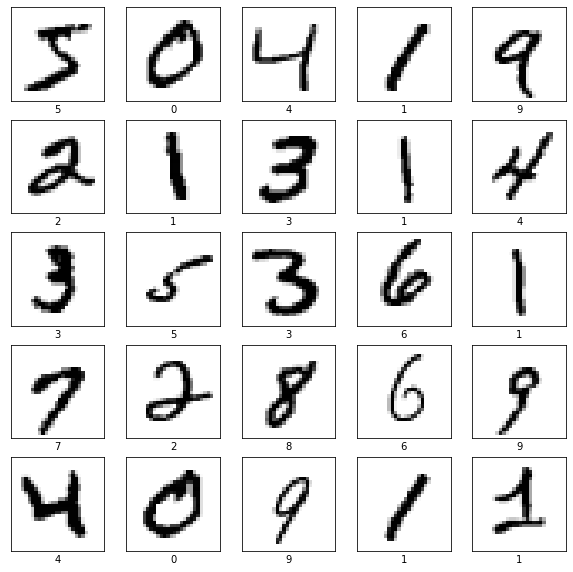

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [0]:
train_images = train_images[...,tf.newaxis]
test_images = test_images[...,tf.newaxis]

data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255.0, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128)

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255.0, test_labels.astype(np.int32))).batch(128)

In [0]:
epochs = 20
n_h = 256
IMG_HEIGHT = 28
IMG_WIDTH = 28
model = models.Sequential([
              layers.Conv2D(16, 3, padding= 'same' , activation= 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 1) ),
              layers.MaxPooling2D(),
              layers.Conv2D(32, 3 , padding= 'same', activation = 'relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
              layers.MaxPooling2D(),
              layers.Flatten(),
              layers.Dense(n_h, activation='relu'),
              layers.Dense(n_h//2, activation='relu'),
              layers.Dense(10)
              ])

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for epoch in range(epochs):
  print("epoch number :", epoch)
  for step , (img_batch, lbl_batch) in enumerate(data):

    with tf.GradientTape() as tape:
        logits = model(img_batch, training=True)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
  print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
  train_acc_metric.reset_states()

    # this is very convenient -- before, we usually had code that
    # evaluates the whole test set at once -- this won't work for
    # large datasets/models. With metrics, we can just iterate
    # over the data and the metric takes care of averaging etc.

  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
  print("Test acc: {}".format(test_acc_metric.result()))

epoch number : 0
Loss: 0.0957537367939949 Accuracy: 0.9289500117301941
Test acc: 0.9729999899864197
epoch number : 1
Loss: 0.014169842936098576 Accuracy: 0.9821166396141052
Test acc: 0.9842000007629395
epoch number : 2
Loss: 0.012982386164367199 Accuracy: 0.987333357334137
Test acc: 0.9905999898910522
epoch number : 3
Loss: 0.005912116263061762 Accuracy: 0.9897000193595886
Test acc: 0.989799976348877
epoch number : 4
Loss: 0.017797095701098442 Accuracy: 0.9918666481971741
Test acc: 0.9916999936103821
epoch number : 5
Loss: 0.00367954489775002 Accuracy: 0.9923333525657654
Test acc: 0.9904999732971191
epoch number : 6
Loss: 0.00615369388833642 Accuracy: 0.9943333268165588
Test acc: 0.9904999732971191
epoch number : 7
Loss: 0.013034597970545292 Accuracy: 0.9944166541099548
Test acc: 0.9918000102043152
epoch number : 8
Loss: 0.07730685919523239 Accuracy: 0.9956499934196472
Test acc: 0.9876000285148621
epoch number : 9
Loss: 0.001449747127480805 Accuracy: 0.9954666495323181
Test acc: 0.9912

# CNN trained on FMNIST

4423680/4422102 [==============================] - 0s 0us/step


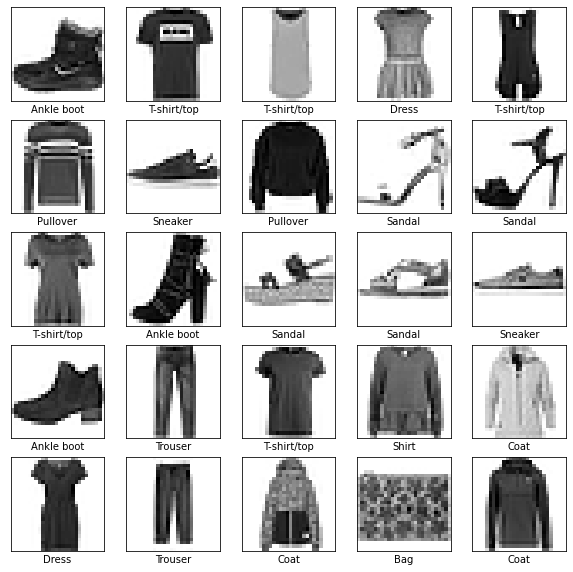

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255.0, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128)

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255.0, test_labels.astype(np.int32))).batch(128)

In [0]:
epochs = 20
n_h = 256
model = models.Sequential([
              layers.Conv2D(32, 3, padding= 'same' , activation= 'relu', input_shape = (28, 28, 1) , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(32, 3 , padding= 'same', activation = 'relu', bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.3)),

              layers.Conv2D(64, 3 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(64, 3 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.4)),

              layers.Conv2D(128, 3, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(128, 3, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.5)),

              layers.Flatten(),
              layers.Dense(n_h, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Dense(n_h//2, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.Dense(10)
              ])

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam(learning_rate= 5 * 1e-3)
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
accuracy_test = []
epochs_list = []
for epoch in range(epochs):
  print("epoch number :", epoch)
  for step , (img_batch, lbl_batch) in enumerate(data):

    with tf.GradientTape() as tape:
        logits = model(img_batch, training=True)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    
        
  print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
  train_acc_metric.reset_states()

   
  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
  print("Test acc: {}".format(test_acc_metric.result()))
  accuracy_test.append(test_acc_metric.result())
  epochs_list.append(epoch)

epoch number : 0
Loss: 0.23847264051437378 Accuracy: 0.819433331489563
Test acc: 0.8676000237464905
epoch number : 1
Loss: 0.2662147581577301 Accuracy: 0.8888333439826965
Test acc: 0.8917999863624573
epoch number : 2
Loss: 0.2825686037540436 Accuracy: 0.8969666957855225
Test acc: 0.9101999998092651
epoch number : 3
Loss: 0.13333511352539062 Accuracy: 0.9093999862670898
Test acc: 0.9089999794960022
epoch number : 4
Loss: 0.2581688463687897 Accuracy: 0.9146999716758728
Test acc: 0.9172000288963318
epoch number : 5
Loss: 0.2197083979845047 Accuracy: 0.919700026512146
Test acc: 0.9175000190734863
epoch number : 6
Loss: 0.19712519645690918 Accuracy: 0.9222999811172485
Test acc: 0.9258000254631042
epoch number : 7
Loss: 0.35288944840431213 Accuracy: 0.926966667175293
Test acc: 0.9186999797821045
epoch number : 8
Loss: 0.32233867049217224 Accuracy: 0.9280499815940857
Test acc: 0.9210000038146973
epoch number : 9
Loss: 0.2364472597837448 Accuracy: 0.9298166632652283
Test acc: 0.916000008583068

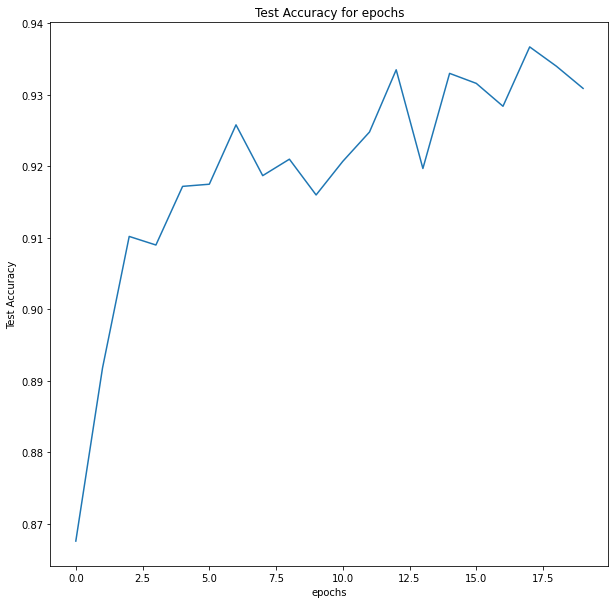

In [0]:
plt.figure(figsize=(10,10))
plt.plot(epochs_list,accuracy_test)
plt.ylabel('Test Accuracy')
plt.xlabel('epochs')
plt.title('Test Accuracy for epochs')
plt.show()

# CNN on CIFAR10

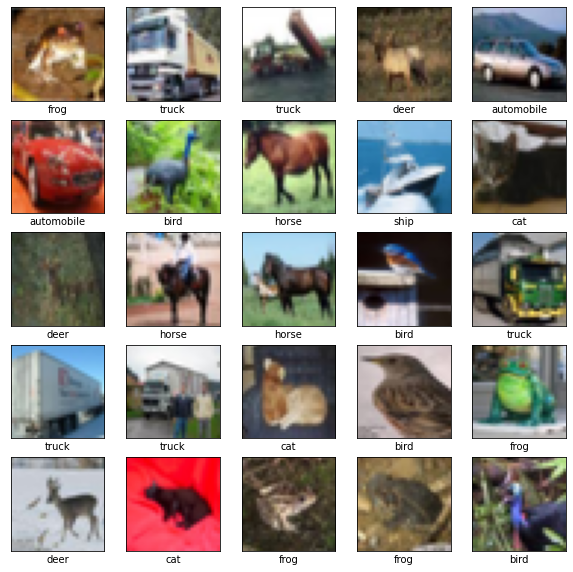

In [0]:
(train_images, train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# print(train_labels.shape,test_labels.shape)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
# train_images = train_images.astype(np.float32) / 255.0
# train_labels = train_labels.astype(np.int32)
# test_images = test_images.astype(np.float32) / 255.0
# test_labels = test_labels.astype(np.int32)

# image_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# train_data_gen = image_gen.flow(train_images,train_labels, batch_size=batch_size,shuffle=True)

# train_labels = train_labels.reshape((-1,))
# test_labels = test_labels.reshape((-1,))

IMG_HEIGHT = 32
IMG_WIDTH = 32
batch_size = 512

data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255.0, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(batch_size)

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255.0, test_labels.astype(np.int32))).batch(batch_size)

In [0]:
epochs = 50
n_h = 256
model = models.Sequential([
              layers.Conv2D(32, 3, padding= 'same' , activation= 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3) , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(32, 3 , padding= 'same', activation = 'relu', bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.3)),

              layers.Conv2D(64, 3 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(64, 3 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.4)),

              layers.Conv2D(128, 3, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(128, 3, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.5)),

              layers.Flatten(),
              layers.Dense(n_h, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Dense(n_h//2, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.Dense(10)
              ])

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam(learning_rate= 5 * 1e-3)
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_215 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_221 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_222 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_109 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 16, 16, 64)      

epoch number : 0
Loss: 1.2953367233276367 Accuracy: 0.46059998869895935
Test acc: 0.13379999995231628
epoch number : 1
Loss: 0.9141170978546143 Accuracy: 0.6237000226974487
Test acc: 0.25850000977516174
epoch number : 2
Loss: 0.862017035484314 Accuracy: 0.6904600262641907
Test acc: 0.4758000075817108
epoch number : 3
Loss: 0.7610881924629211 Accuracy: 0.7353799939155579
Test acc: 0.6388000249862671
epoch number : 4
Loss: 0.7523062229156494 Accuracy: 0.7559999823570251
Test acc: 0.7250999808311462
epoch number : 5
Loss: 0.7750816345214844 Accuracy: 0.7825199961662292
Test acc: 0.7728000283241272
epoch number : 6
Loss: 0.6633355021476746 Accuracy: 0.8008999824523926
Test acc: 0.789900004863739
epoch number : 7
Loss: 0.43979454040527344 Accuracy: 0.8136799931526184
Test acc: 0.7773000001907349
epoch number : 8
Loss: 0.5888394117355347 Accuracy: 0.8241599798202515
Test acc: 0.8029000163078308
epoch number : 9
Loss: 0.41643643379211426 Accuracy: 0.83406001329422
Test acc: 0.8068000078201294

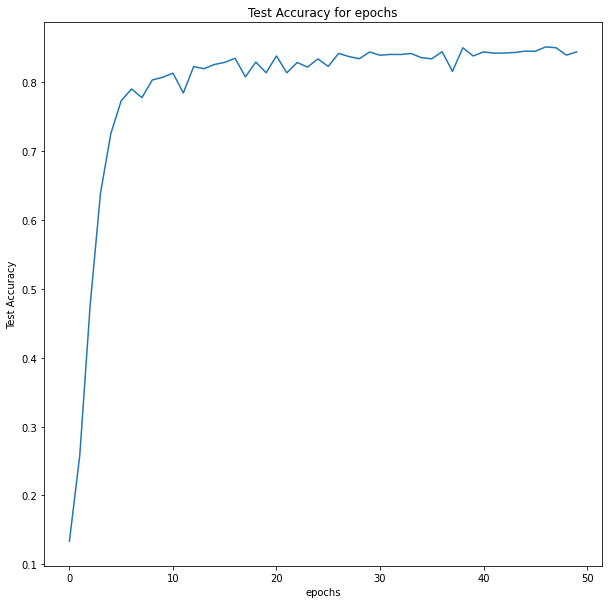

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
accuracy_test = []
epochs_list = []
for epoch in range(epochs):
  print("epoch number :", epoch)
  for step , (img_batch, lbl_batch) in enumerate(data):

    with tf.GradientTape() as tape:
        logits = model(img_batch, training=True)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
  print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
  train_acc_metric.reset_states()

    # this is very convenient -- before, we usually had code that
    # evaluates the whole test set at once -- this won't work for
    # large datasets/models. With metrics, we can just iterate
    # over the data and the metric takes care of averaging etc.

  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
  print("Test acc: {}".format(test_acc_metric.result()))
  accuracy_test.append(test_acc_metric.result())
  epochs_list.append(epoch)
plt.figure(figsize=(10,10))
plt.plot(epochs_list,accuracy_test)
plt.ylabel('Test Accuracy')
plt.xlabel('epochs')
plt.title('Test Accuracy for epochs')
plt.show()

# Trying filter size as (32,32)

In [0]:
epochs = 31
n_h = 256
model = models.Sequential([
              layers.Conv2D(32, 32, padding= 'same' , activation= 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3) , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(32, 32 , padding= 'same', activation = 'relu', bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.3)),

              layers.Conv2D(64, 32 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(64, 32 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.4)),

              layers.Conv2D(128, 32, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(128, 32, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.5)),

              layers.Flatten(),
              layers.Dense(n_h, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Dense(n_h//2, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.Dense(10)
              ])

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam(learning_rate= 5 * 1e-3)
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_197 (Conv2D)          (None, 32, 32, 32)        98336     
_________________________________________________________________
batch_normalization_200 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 32, 32, 32)        1048608   
_________________________________________________________________
batch_normalization_201 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_100 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 16, 16, 64)      

epoch number : 0
Loss: 1.9180020093917847 Accuracy: 0.21549999713897705
Test acc: 0.18790000677108765
epoch number : 1
Loss: 1.7404115200042725 Accuracy: 0.3276599943637848
Test acc: 0.30809998512268066
epoch number : 2
Loss: 1.6052162647247314 Accuracy: 0.4072200059890747
Test acc: 0.33719998598098755
epoch number : 3
Loss: 1.441589593887329 Accuracy: 0.4528200030326843
Test acc: 0.36340001225471497
epoch number : 4
Loss: 1.4421236515045166 Accuracy: 0.48399999737739563
Test acc: 0.3959999978542328
epoch number : 5
Loss: 1.23664128780365 Accuracy: 0.506600022315979
Test acc: 0.5008999705314636
epoch number : 6
Loss: 1.2528979778289795 Accuracy: 0.531000018119812
Test acc: 0.44110000133514404
epoch number : 7
Loss: 1.1544015407562256 Accuracy: 0.5461599826812744
Test acc: 0.5357000231742859
epoch number : 8
Loss: 1.1199617385864258 Accuracy: 0.5680000185966492
Test acc: 0.5343999862670898
epoch number : 9
Loss: 1.272990345954895 Accuracy: 0.5859599709510803
Test acc: 0.4449000060558319

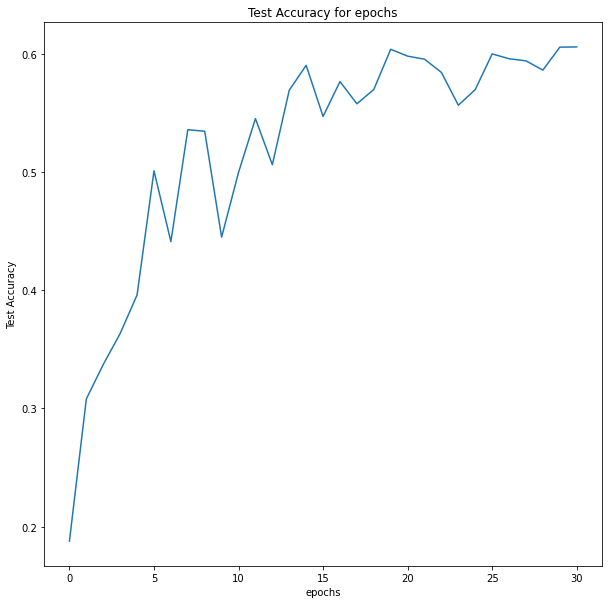

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
accuracy_test = []
epochs_list = []
for epoch in range(epochs):
  print("epoch number :", epoch)
  for step , (img_batch, lbl_batch) in enumerate(data):

    with tf.GradientTape() as tape:
        logits = model(img_batch, training=True)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
  print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
  train_acc_metric.reset_states()

    # this is very convenient -- before, we usually had code that
    # evaluates the whole test set at once -- this won't work for
    # large datasets/models. With metrics, we can just iterate
    # over the data and the metric takes care of averaging etc.

  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
  print("Test acc: {}".format(test_acc_metric.result()))
  accuracy_test.append(test_acc_metric.result())
  epochs_list.append(epoch)
plt.figure(figsize=(10,10))
plt.plot(epochs_list,accuracy_test)
plt.ylabel('Test Accuracy')
plt.xlabel('epochs')
plt.title('Test Accuracy for epochs')
plt.show()

By increasing filter sizes to 32 for initial few epochs train accuracy and test accuracy were increasing linearly. But going further train accuracy reached 91% and test accuracy was around 58-60% which means dataset is overfitted. As we have large generalization error.

# Trying filter size of (1,1)

In [0]:
epochs = 31
n_h = 256
model = models.Sequential([
              layers.Conv2D(32, 1, padding= 'same' , activation= 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3) , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(32, 1 , padding= 'same', activation = 'relu', bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.3)),

              layers.Conv2D(64, 1 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(64, 1 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.4)),

              layers.Conv2D(128, 1, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(128, 1, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.5)),

              layers.Flatten(),
              layers.Dense(n_h, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Dense(n_h//2, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.Dense(10)
              ])

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam(learning_rate= 5 * 1e-3)
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_209 (Conv2D)          (None, 32, 32, 32)        128       
_________________________________________________________________
batch_normalization_214 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 32, 32, 32)        1056      
_________________________________________________________________
batch_normalization_215 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_106 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 16, 16, 64)      

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
accuracy_test = []
epochs_list = []
for epoch in range(epochs):
  print("epoch number :", epoch)
  for step , (img_batch, lbl_batch) in enumerate(data):

    with tf.GradientTape() as tape:
        logits = model(img_batch, training=True)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
  print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
  train_acc_metric.reset_states()

    # this is very convenient -- before, we usually had code that
    # evaluates the whole test set at once -- this won't work for
    # large datasets/models. With metrics, we can just iterate
    # over the data and the metric takes care of averaging etc.

  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
  print("Test acc: {}".format(test_acc_metric.result()))
  accuracy_test.append(test_acc_metric.result())
  epochs_list.append(epoch)

epoch number : 0
Loss: 1.4334896802902222 Accuracy: 0.402539998292923
Test acc: 0.26109999418258667
epoch number : 1
Loss: 1.3572343587875366 Accuracy: 0.5050600171089172
Test acc: 0.2957000136375427
epoch number : 2
Loss: 1.266324758529663 Accuracy: 0.5418800115585327
Test acc: 0.44029998779296875
epoch number : 3
Loss: 1.1263537406921387 Accuracy: 0.5620599985122681
Test acc: 0.33980000019073486
epoch number : 4
Loss: 1.1359338760375977 Accuracy: 0.5790600180625916
Test acc: 0.38530001044273376
epoch number : 5
Loss: 1.153734803199768 Accuracy: 0.5974599719047546
Test acc: 0.4489000141620636
epoch number : 6
Loss: 1.1139352321624756 Accuracy: 0.6099399924278259
Test acc: 0.41449999809265137
epoch number : 7
Loss: 1.098163366317749 Accuracy: 0.6217799782752991
Test acc: 0.5501999855041504
epoch number : 8
Loss: 1.0004065036773682 Accuracy: 0.6321399807929993
Test acc: 0.47530001401901245
epoch number : 9
Loss: 1.0103082656860352 Accuracy: 0.6375799775123596
Test acc: 0.554700016975402

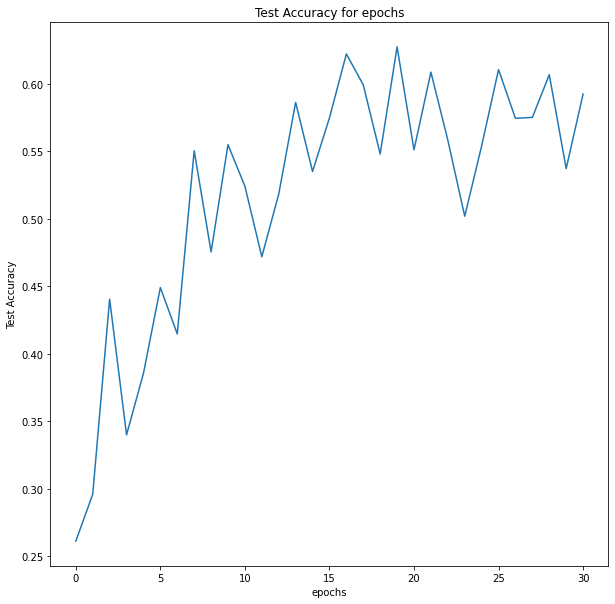

In [0]:
plt.figure(figsize=(10,10))
plt.plot(epochs_list,accuracy_test)
plt.ylabel('Test Accuracy')
plt.xlabel('epochs')
plt.title('Test Accuracy for epochs')
plt.show()

With filters size as (1,1) train accuracy reached only around 70-74% and test as 55-59% and it was almost the same case for all the epochs. It can be seen with filter size minimum, model is not overfitting.

# CIFAR100

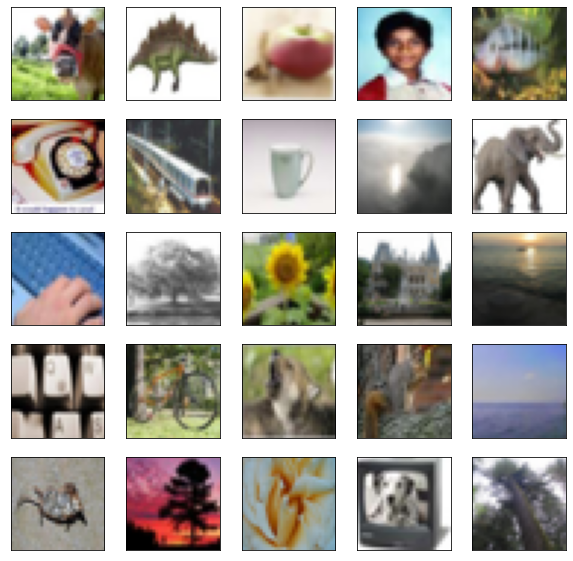

In [0]:
(train_images, train_labels) , (test_images , test_labels) = datasets.cifar100.load_data()
# print(train_labels.shape,test_labels.shape)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [0]:
# train_images = train_images.astype(np.float32) / 255.0
# train_labels = train_labels.astype(np.int32)
# test_images = test_images.astype(np.float32) / 255.0
# test_labels = test_labels.astype(np.int32)

# image_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# train_data_gen = image_gen.flow(train_images,train_labels, batch_size=batch_size,shuffle=True)

# train_labels = train_labels.reshape((-1,))
# test_labels = test_labels.reshape((-1,))

IMG_HEIGHT = 32
IMG_WIDTH = 32
batch_size = 512

data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255.0, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(batch_size)

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255.0, test_labels.astype(np.int32))).batch(batch_size)

In [0]:
epochs = 50
n_h = 256
model = models.Sequential([
              layers.Conv2D(32, 3, padding= 'same' , activation= 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3) , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(32, 3 , padding= 'same', activation = 'relu', bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.3)),

              layers.Conv2D(64, 3 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(64, 3 , padding= 'same', activation = 'relu' , bias_initializer = 'glorot_uniform' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.4)),

              layers.Conv2D(128, 3, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Conv2D(128, 3, padding= 'same', activation= 'relu' , bias_initializer = 'glorot_uniform', kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.MaxPooling2D(),
              layers.Dropout((0.5)),

              layers.Flatten(),
              layers.Dense(n_h, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.BatchNormalization(),
              layers.Dense(n_h//2, activation='relu' , kernel_initializer= 'he_uniform'),
              layers.Dense(100)
              ])

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam(learning_rate= 5 * 1e-3)
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
accuracy_test = []
epochs_list = []
for epoch in range(epochs):
  print("epoch number :", epoch)
  for step , (img_batch, lbl_batch) in enumerate(data):

    with tf.GradientTape() as tape:
        logits = model(img_batch, training=True)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
  print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
  train_acc_metric.reset_states()

    

  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
  print("Test acc: {}".format(test_acc_metric.result()))
  accuracy_test.append(test_acc_metric.result())
  epochs_list.append(epoch)

epoch number : 0
Loss: 3.4223313331604004 Accuracy: 0.12654000520706177
Test acc: 0.06689999997615814
epoch number : 1
Loss: 2.7717232704162598 Accuracy: 0.24276000261306763
Test acc: 0.11630000174045563
epoch number : 2
Loss: 2.5739779472351074 Accuracy: 0.3179199993610382
Test acc: 0.18379999697208405
epoch number : 3
Loss: 2.2599546909332275 Accuracy: 0.38082000613212585
Test acc: 0.2874999940395355
epoch number : 4
Loss: 2.0215232372283936 Accuracy: 0.4187600016593933
Test acc: 0.4050999879837036
epoch number : 5
Loss: 1.9611966609954834 Accuracy: 0.4566600024700165
Test acc: 0.4300999939441681
epoch number : 6
Loss: 1.8120824098587036 Accuracy: 0.483599990606308
Test acc: 0.4431999921798706
epoch number : 7
Loss: 1.6821482181549072 Accuracy: 0.5051199793815613
Test acc: 0.48240000009536743
epoch number : 8
Loss: 1.6085904836654663 Accuracy: 0.5240399837493896
Test acc: 0.46480000019073486
epoch number : 9
Loss: 1.6609716415405273 Accuracy: 0.5397999882698059
Test acc: 0.4654999971

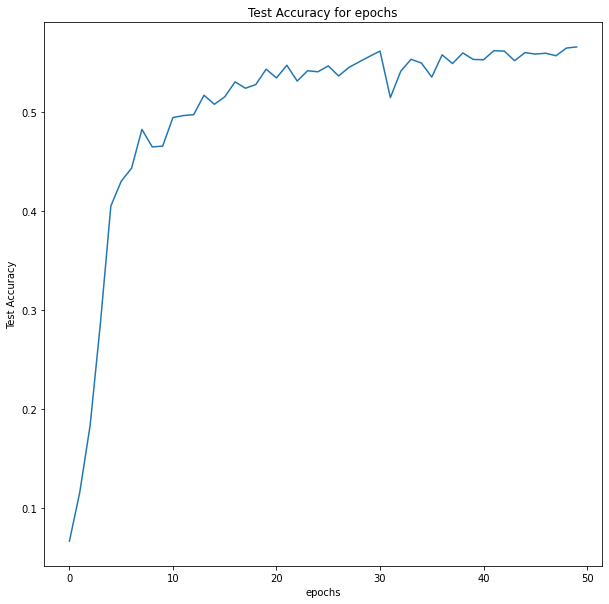

In [0]:
plt.figure(figsize=(10,10))
plt.plot(epochs_list,accuracy_test)
plt.ylabel('Test Accuracy')
plt.xlabel('epochs')
plt.title('Test Accuracy for epochs')
plt.show()

# Feature Maps

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[...,tf.newaxis]
test_images = test_images[...,tf.newaxis]
print(train_images.shape)
data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255.0, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128)

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255.0, test_labels.astype(np.int32))).batch(128)

(60000, 28, 28, 1)


In [0]:
epochs = 10
n_h = 256
IMG_HEIGHT = 28
IMG_WIDTH = 28
model = models.Sequential([
              layers.Conv2D(16, 3, padding= 'same' , activation= 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 1) ),
              layers.MaxPooling2D(),
              layers.Conv2D(32, 3 , padding= 'same', activation = 'relu'),
              layers.MaxPooling2D(),
              layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
              layers.MaxPooling2D(),
              layers.Flatten(),
              layers.Dense(n_h, activation='relu'),
              layers.Dense(n_h//2, activation='relu'),
              layers.Dense(10)
              ])

#model.build((None, 784))  # optional -- note None for the batch axis!!

opt = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for epoch in range(epochs):
  print("epoch number :", epoch)
  for step , (img_batch, lbl_batch) in enumerate(data):

    with tf.GradientTape() as tape:
        logits = model(img_batch, training=True)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
  print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
  train_acc_metric.reset_states()

    # this is very convenient -- before, we usually had code that
    # evaluates the whole test set at once -- this won't work for
    # large datasets/models. With metrics, we can just iterate
    # over the data and the metric takes care of averaging etc.

  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
  print("Test acc: {}".format(test_acc_metric.result()))

epoch number : 0
Loss: 0.06871384382247925 Accuracy: 0.9239833354949951
Test acc: 0.9794999957084656
epoch number : 1
Loss: 0.009785040281713009 Accuracy: 0.9807000160217285
Test acc: 0.9857000112533569
epoch number : 2
Loss: 0.03835080936551094 Accuracy: 0.9868333339691162
Test acc: 0.9848999977111816
epoch number : 3
Loss: 0.07593092322349548 Accuracy: 0.9899166822433472
Test acc: 0.9891999959945679
epoch number : 4
Loss: 0.016031434759497643 Accuracy: 0.9911666512489319
Test acc: 0.9907000064849854
epoch number : 5
Loss: 0.0012617334723472595 Accuracy: 0.993316650390625
Test acc: 0.9904999732971191
epoch number : 6
Loss: 0.026300720870494843 Accuracy: 0.9934666752815247
Test acc: 0.9914000034332275
epoch number : 7
Loss: 0.002327310387045145 Accuracy: 0.9944666624069214
Test acc: 0.9911999702453613
epoch number : 8
Loss: 0.007880252785980701 Accuracy: 0.9952333569526672
Test acc: 0.9904000163078308
epoch number : 9
Loss: 0.00023997185053303838 Accuracy: 0.9958833456039429
Test acc: 

In [0]:
from keras.preprocessing import image
img_tensor = image.img_to_array(train_images[0])
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor.astype(np.float32) / 255.0
print(img_tensor.shape)

(1, 28, 28, 1)


In [0]:
layer_outputs = [layer.output for layer in model.layers[:9]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

In [0]:
activations = activation_model.predict(img_tensor)

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 16)


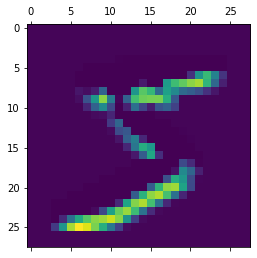

In [0]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

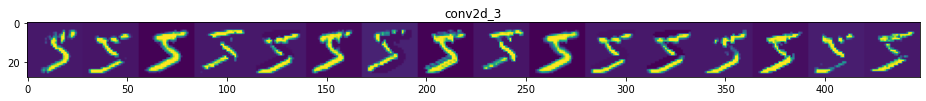

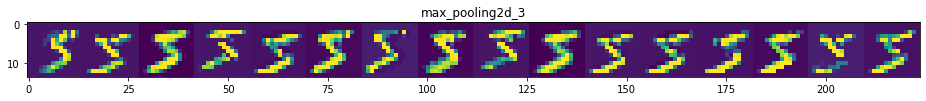

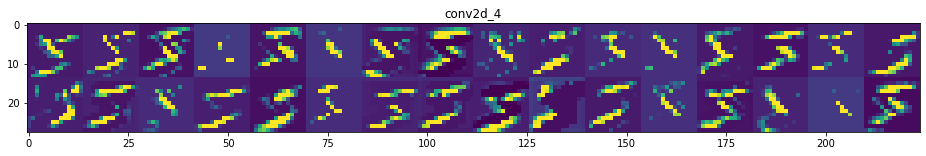

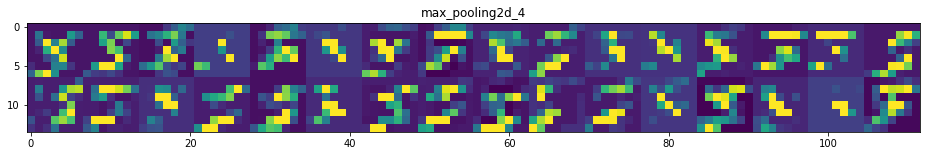

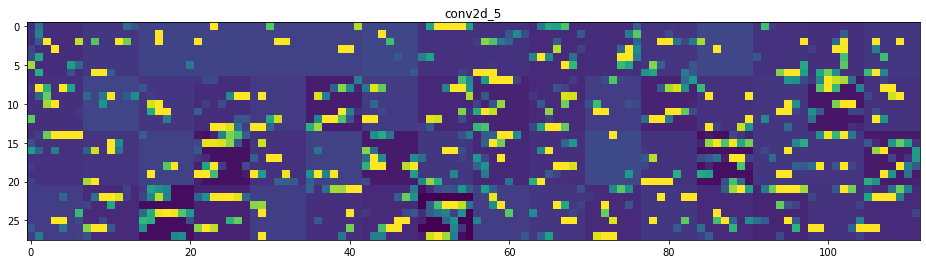

In [0]:
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): 
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


This visualisation of activation layers , code we have taken from - [link](https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md)